<a href="https://colab.research.google.com/github/JaledMC/Learning-Artificial-Vision/blob/master/drawing_functions_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing functions on images

We can draw different shapes, or put text on the image. This functions modify the original image. Because of that, we make a copy of the original for each example.

If you don't have the needed libraries, run the next block.

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip3 install -q -U opencv-python
!pip3 install -q matplotlib
!pip3 install -q numpy
!pip3 install -q requests

Import the libraries

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Download the github photo

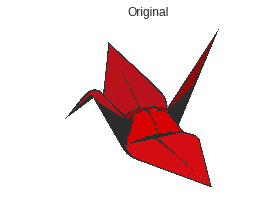

In [0]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/origami.png')
img = Image.open(BytesIO(response.content))
img.save("origami.png")
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.imshow(img)
axes.set_title('Original')
plt.axis("off");

image = cv2.imread('origami.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Draw and put text in the images

In [0]:
# Generating multiple clones of the image in a list
photos = []
for i in range(7):
    photos.append(image.copy())

# Draw a line on the image. Params: image, (start coordinate, finish coordinate), color, width    
cv2.line(photos[1], (0, 0), (1150, 450), (250, 250, 250), 20) 
# Draw a circle on the image. Params: image, centre_coordinate, radius, color, width(negative == fill)
cv2.circle(photos[2], (200, 200), 50, (230, 10, 200), -1)  
# Draw a rectangle on the image. Params: image, border_cor_1, border_cor_2, color, width
cv2.rectangle(photos[3], (30, 30), (1040, 1240), (200, 30, 200), 20)   
# Draw a polygon. Fist we need a set of points. Params: image, points, close-shape, color, width
points = np.array([[10, 10], [20, 1060], [130, 200], [580, 200], [10, 30]], np.int32)
cv2.polylines(photos[4], [points], True, (255, 30, 100), 6);  

# Put text on the image. Params: image, text, origin, font, fontScale, color, thickness, lineType
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(photos[5], 'OpenCV', (200, 350), font, 10, (200, 255, 155), 10, cv2.LINE_AA);

Represent the images

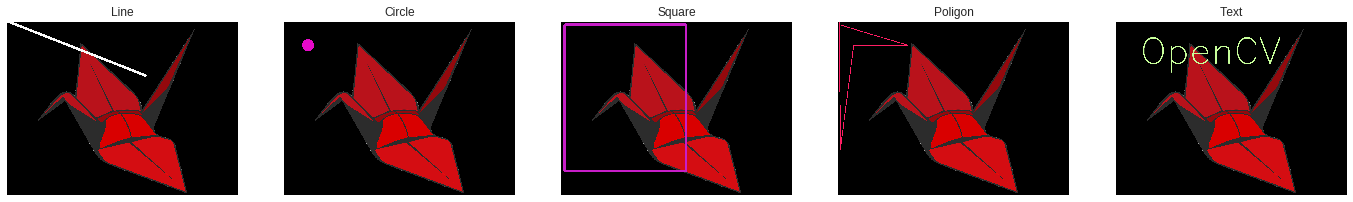

In [0]:
fig, axes = plt.subplots(1, 5, figsize=(24, 12))
axes[0].imshow(photos[1])
axes[0].set_title('Line')
axes[1].imshow(photos[2])
axes[1].set_title('Circle')
axes[2].imshow(photos[3])
axes[2].set_title('Square')
axes[3].imshow(photos[4])
axes[3].set_title('Poligon')
axes[4].imshow(photos[5])
axes[4].set_title('Text')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])